## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict

Importing the dataset

In [3]:
df=pd.read_csv('vehicle.csv')

#### Exploratory Data Analysis
##### Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [4]:
df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [7]:
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

We have many columns with null values so replacing the null values with median values

In [8]:
for Column in df._get_numeric_data():
    df[Column].fillna(df[Column].median(), inplace = True) 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [12]:
# Converting Categorical to continious
vehicle_con=pd.DataFrame(index=df.index)
for column in df:
    LE = LabelEncoder()    
    vehicle_con[column] = LE.fit_transform(df[column])

<Figure size 1440x739.44 with 0 Axes>

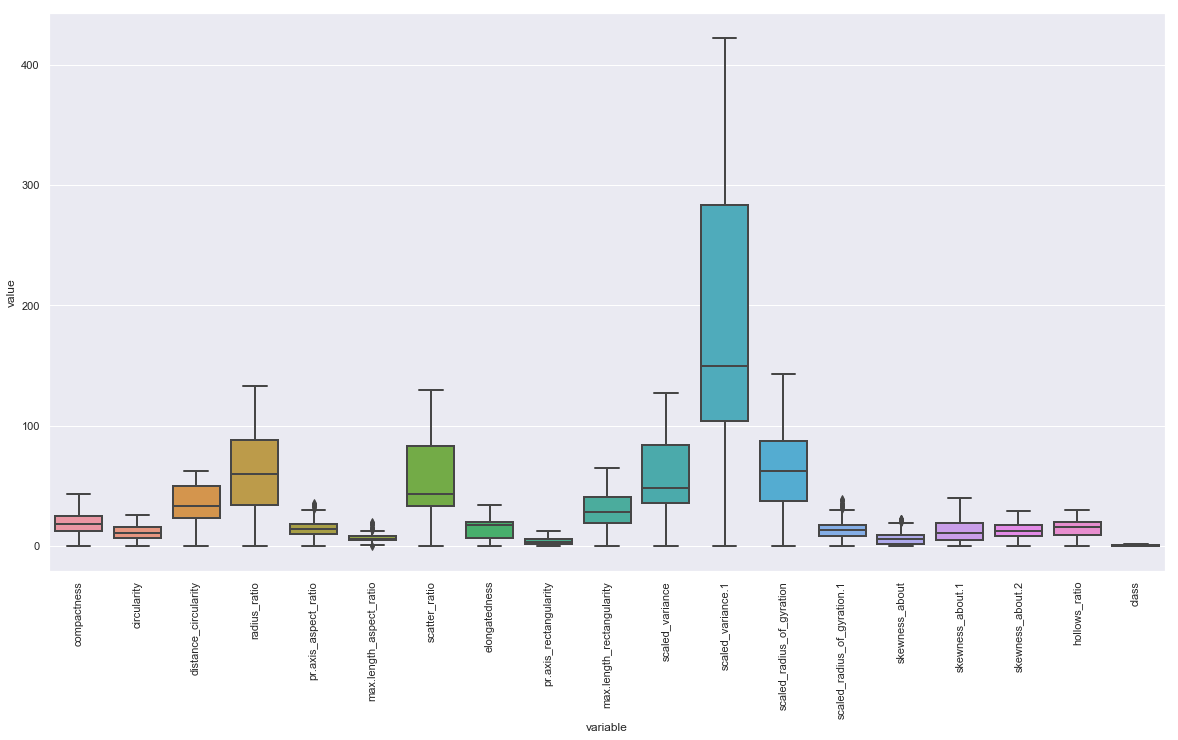

<Figure size 1440x739.44 with 0 Axes>

In [13]:
# Univariate Visualisation
sns.set(rc={'figure.figsize':(20.0,10.27)})
ax= sns.boxplot(x="variable", y="value", data=pd.melt(vehicle_con),linewidth=2.0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

#### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [14]:
Drop_out=[]
for Column in vehicle_con:
    corr, p_value = pearsonr(vehicle_con[Column], vehicle_con['class'])
    print(Column,': ',corr)
    if corr < 0: Drop_out.append(Column)

# Negatively correlated values will add no benefit to our prediction, hence creating a list of negative corelated features
print('Columns with negative correlation value:',Drop_out)

compactness :  -0.03382891533922543
circularity :  -0.1589098660726646
distance_circularity :  -0.05873336045002842
radius_ratio :  -0.20151770599917646
pr.axis_aspect_ratio :  -0.1758786366675998
max.length_aspect_ratio :  0.3206792461295185
scatter_ratio :  -0.2813543203725017
elongatedness :  0.33946800540637456
pr.axis_rectangularity :  -0.2584811098766274
max.length_rectangularity :  -0.03250029789562391
scaled_variance :  -0.3115745877038996
scaled_variance.1 :  -0.28876808891524136
scaled_radius_of_gyration :  -0.24660477697843788
scaled_radius_of_gyration.1 :  -0.2407793182794423
skewness_about :  0.1195810510495041
skewness_about.1 :  -0.01075503076323529
skewness_about.2 :  0.06727308919188395
hollows_ratio :  0.23587414847233304
class :  1.0
Columns with negative correlation value: ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_va

In [15]:
vehicle_con = vehicle_con.drop(Drop_out, axis=1)
X=vehicle_con.drop(['class'], axis=1)
Y=vehicle_con['class']

Scaling data is always a good practise and also from box plot we can see data are distibuted differently.

In [16]:
X_Scaled = X.apply(zscore)

#### Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 

In [17]:
cov_matrix = np.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343 -0.40767249  0.07242829  0.03714115  0.33176114]
 [-0.40767249  1.00118343 -0.05285639 -0.11527063 -0.21698627]
 [ 0.07242829 -0.05285639  1.00118343  0.11487915  0.09724079]
 [ 0.03714115 -0.11527063  0.11487915  1.00118343  0.89370329]
 [ 0.33176114 -0.21698627  0.09724079  0.89370329  1.00118343]]


In [18]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.3407294  -0.23234446  0.66703804 -0.61897925  0.04294734]
 [-0.31974996 -0.017786    0.72431886  0.60609636 -0.0738446 ]
 [ 0.15454231  0.0251522  -0.01986675 -0.01428699 -0.98736277]
 [ 0.58218039 -0.66683425 -0.12299644  0.44310498  0.07019918]
 [ 0.64718321  0.70738897  0.12206408  0.23014291  0.11353123]]

Eigenvalues 
[2.11021479 0.0586614  0.61020738 1.2521025  0.9747311 ]


In [19]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 42.15440891  67.1668583   86.63843695  98.82815881 100.        ]


#### Elbox plot to identify the PCA components

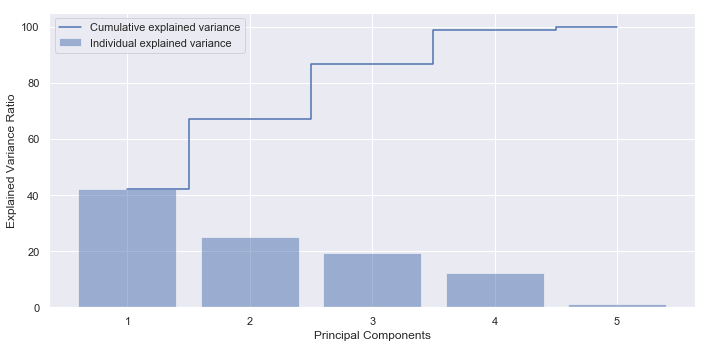

In [20]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [21]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_Scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


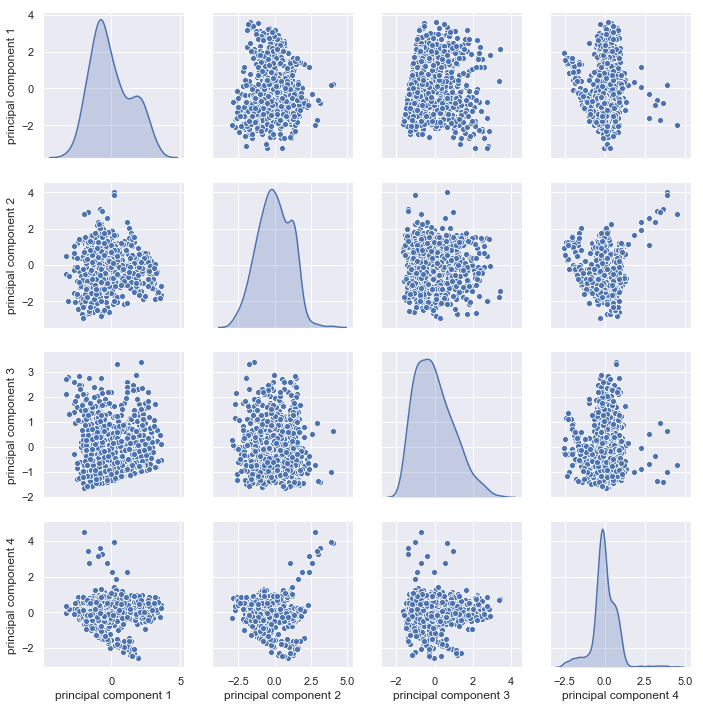

In [22]:
sns.pairplot(principalDf, diag_kind='kde')

Splitting the dataset

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(principalDf, Y, test_size=0.30, random_state=691)

#### Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy

In [24]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.05,0.5,1]}
SVC=svm.SVC(gamma='scale')

clf = GridSearchCV(SVC, parameters, cv=10)
clf.fit(principalDf, Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.05, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print("Best Parameters:",clf.best_params_)
print("Best Score:",clf.best_score_)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Score: 0.8581560283687943


In [26]:
SVC1=svm.SVC(C=1,kernel='rbf',gamma='scale')
Score=cross_val_score(SVC, principalDf, Y, cv=10)

In [27]:
print("Average score:" , np.mean(Score))

Average score: 0.8580518548882969


In [29]:
SVC1.fit(X_train, y_train)
SVC1.score(X_test,y_test)

0.8267716535433071